In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [44]:
t = np.linspace(0, 10, 1000)
n_e = 40
x0 = np.random.uniform(-1,1,size = n_e)

In [45]:
def df(x0, dt):
    return dt*((x0%7)**2 + 0.01*x0%8)*(np.exp(-1.0*x0%9))

def model_run(x0, t):
    x = np.zeros(len(t))
    x[0] = x0
    dt = t[1]-t[0]
    for i,time in enumerate(t):
        if i != 0:
            x[i] = x[i-1] + df(x[i-1], dt)
    return x

In [46]:
x_array = []
for i, x1 in enumerate(x0):
    x = model_run(x1, t)
    x_array.append(x)
x_obs = x_array[0]
x_array1 = x_array[1:]

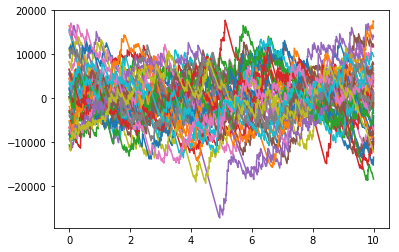

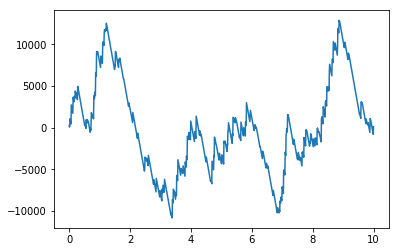

In [47]:
for i,x in enumerate(x_array):
    fit = np.polyval(np.polyfit(t, x, deg=1), t)
    x += -fit
    x_array[i] = x
    plt.plot(t, x)

plt.figure()
plt.plot(t, x_obs)
plt.show()


In [48]:
t_mean = np.zeros(len(x_array1))
t_std = np.zeros(len(x_array1))
for i, x in enumerate(x_array1):
    t_mean[i] = np.mean(x)
    t_std[i] = np.std(x)
e_mean = np.mean(t_mean) 
e_std = np.sqrt(sum(t_std**2))/n_e


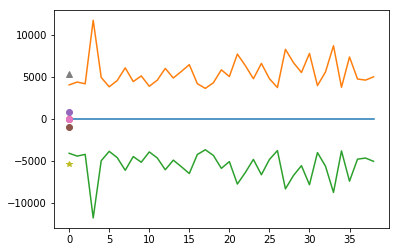

In [49]:
plt.plot(t_mean)
plt.plot(t_std)
plt.plot(-t_std)

plt.plot(e_mean, 'o')
plt.plot(e_std, 'o')
plt.plot(-e_std, 'o')

plt.plot(np.mean(x_obs), 'o')
plt.plot(np.std(x_obs), '^')
plt.plot(-np.std(x_obs), '*')

plt.show()

In [50]:
qwe =np.array(x_array1)

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


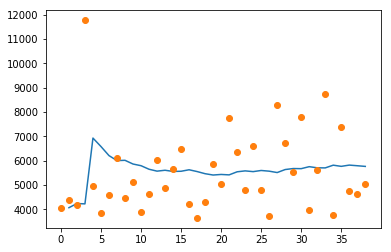

In [65]:
qwe_std = np.zeros(len(qwe))
ensemble_std = np.zeros(len(qwe))
for i, ensemble in enumerate(qwe):
    qwe_std[i] = np.std(qwe[:i])
    ensemble_std[i] = np.std(ensemble)
    
plt.plot(range(len(qwe)), qwe_std)
plt.plot(range(len(qwe)), ensemble_std, 'o')
plt.show()